<a href="https://colab.research.google.com/github/HeegonJin/ML_study/blob/master/Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


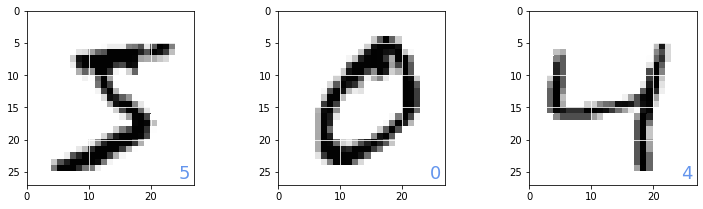

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
  plt.subplot(1, 3, id + 1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, f"{y_train[id]}", 
           color = 'cornflowerblue', fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')
plt.show()

In [ ]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
import time

start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[1])
print('Test accuracy:', score[1])
print(f"computation time:{time.time() - start_time:.3f} sec.")

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 2.1734 - accuracy: 0.2271 - val_loss: 1.6657 - val_accuracy: 0.5698
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 1.5763 - accuracy: 0.6062 - val_loss: 1.3354 - val_accuracy: 0.7061
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 1.2820 - accuracy: 0.7319 - val_loss: 1.1080 - val_accuracy: 0.8000
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 1.0725 - accuracy: 0.8084 - val_loss: 0.9384 - val_accuracy: 0.8453
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.9140 - accuracy: 0.8454 - val_loss: 0.8100 - val_accuracy: 0.8667
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7963 - accuracy: 0.8642 - val_loss: 0.7131 - val_accuracy: 0.8786
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7081 - accuracy: 0.8735 - val_loss: 0.6389 - val_accuracy: 0.8842
Epoch 8/10
60/60 [=

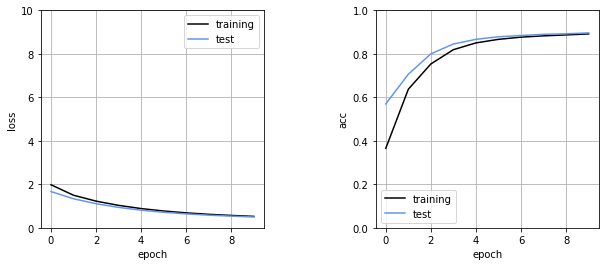

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [ ]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()
  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
  plt.show()

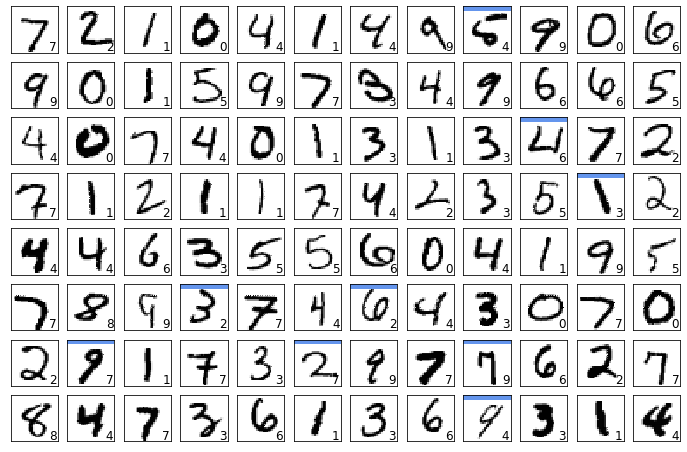

In [ ]:
show_prediction()

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[1])
print('Test accuracy:', score[1])
print(f"computation time:{time.time() - start_time:.3f} sec.")

Epoch 1/10
60/60 [==============================] - 1s 11ms/step - loss: 1.8309 - accuracy: 0.4071 - val_loss: 0.8077 - val_accuracy: 0.8144
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7225 - accuracy: 0.8261 - val_loss: 0.4796 - val_accuracy: 0.8818
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4737 - accuracy: 0.8783 - val_loss: 0.3817 - val_accuracy: 0.8987
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3823 - accuracy: 0.8986 - val_loss: 0.3355 - val_accuracy: 0.9092
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3417 - accuracy: 0.9064 - val_loss: 0.3122 - val_accuracy: 0.9145
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3185 - accuracy: 0.9128 - val_loss: 0.2948 - val_accuracy: 0.9198
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2983 - accuracy: 0.9174 - val_loss: 0.2835 - val_accuracy: 0.9217
Epoch 8/10
60/60 [=

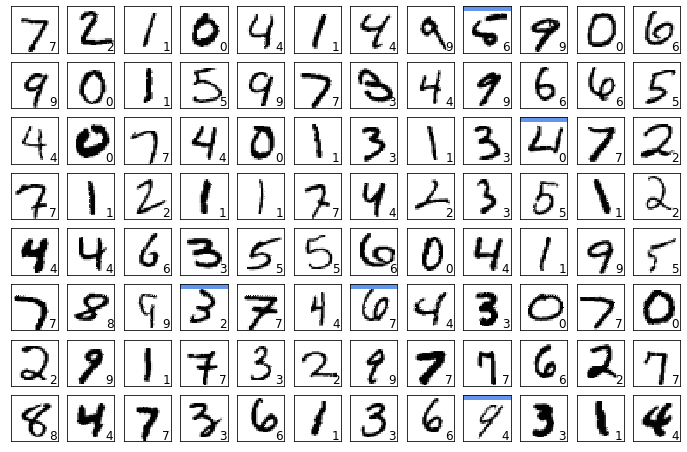

In [ ]:
show_prediction()

(784, 16)


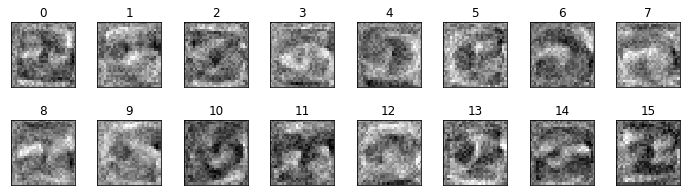

In [ ]:
w = model.layers[0].get_weights()[0]
print(w.shape)
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
  plt.subplot(2, 8, i+1)
  w1 = w[:, i] 
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

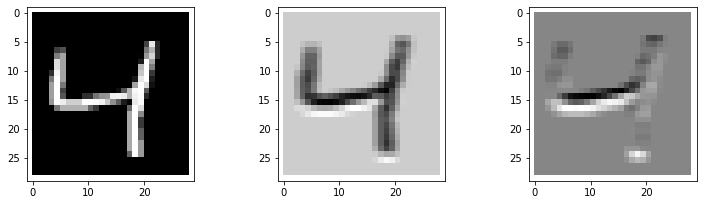

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1], [-2, -2, -2], [-2, -2, -2]], dtype=float)
myfil2 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
  for iw in range(img_w - 3):
    img_part = x_img[ih:ih + 3, iw:iw + 3]
    out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
    out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))


plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
start_time = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])
print(f'Computation time:{time.time() - start_time:.3f}')

Epoch 1/20
60/60 [==============================] - 11s 176ms/step - loss: 1.5334 - accuracy: 0.6709 - val_loss: 0.3769 - val_accuracy: 0.8986
Epoch 2/20
60/60 [==============================] - 10s 173ms/step - loss: 0.3527 - accuracy: 0.9031 - val_loss: 0.2677 - val_accuracy: 0.9262
Epoch 3/20
60/60 [==============================] - 10s 173ms/step - loss: 0.2647 - accuracy: 0.9264 - val_loss: 0.2247 - val_accuracy: 0.9390
Epoch 4/20
60/60 [==============================] - 10s 173ms/step - loss: 0.2226 - accuracy: 0.9387 - val_loss: 0.1921 - val_accuracy: 0.9484
Epoch 5/20
60/60 [==============================] - 10s 174ms/step - loss: 0.1882 - accuracy: 0.9483 - val_loss: 0.1707 - val_accuracy: 0.9545
Epoch 6/20
60/60 [==============================] - 10s 174ms/step - loss: 0.1667 - accuracy: 0.9534 - val_loss: 0.1544 - val_accuracy: 0.9578
Epoch 7/20
60/60 [==============================] - 10s 175ms/step - loss: 0.1503 - accuracy: 0.9596 - val_loss: 0.1416 - val_accuracy: 0.9604

TypeError: ignored

In [ ]:
print(f'Computation time:{time.time() - start_time:.3f}')

Computation time:297.681


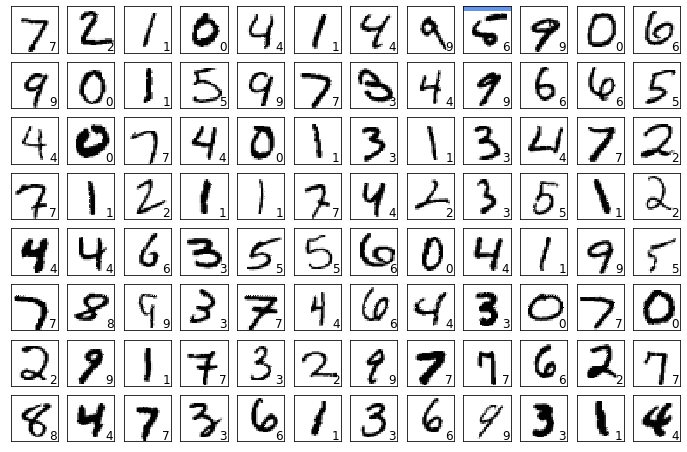

In [ ]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()
  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
  plt.show()

show_prediction()

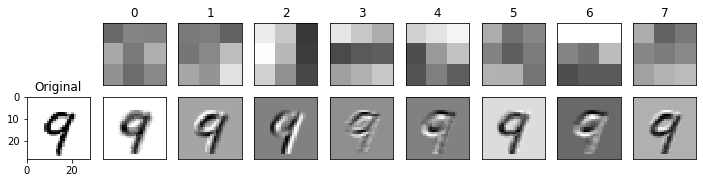

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_w)
plt.ylim(img_h, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title('Original')

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
  plt.subplot(2, 9, i+2)
  w1 = w[:, :, 0, i] 
  w1 = w1.reshape(3, 3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0, 3)
  plt.ylim(3, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2, 9, i+ 11)
  out_img = np.zeros_like(x_img)

  for ih in range(img_h -3):
    for iw in range(img_w -3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
start_time = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])
print(f'Computation time:{time.time() - start_time:.3f}')

Epoch 1/20
60/60 [==============================] - 108s 2s/step - loss: 1.1442 - accuracy: 0.6447 - val_loss: 0.1276 - val_accuracy: 0.9594
Epoch 2/20
60/60 [==============================] - 108s 2s/step - loss: 0.1486 - accuracy: 0.9547 - val_loss: 0.0655 - val_accuracy: 0.9786
Epoch 3/20
60/60 [==============================] - 108s 2s/step - loss: 0.0912 - accuracy: 0.9721 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 4/20
60/60 [==============================] - 109s 2s/step - loss: 0.0703 - accuracy: 0.9787 - val_loss: 0.0384 - val_accuracy: 0.9872
Epoch 5/20
60/60 [==============================] - 108s 2s/step - loss: 0.0600 - accuracy: 0.9821 - val_loss: 0.0325 - val_accuracy: 0.9896
Epoch 6/20
60/60 [==============================] - 109s 2s/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0275 - val_accuracy: 0.9903
Epoch 7/20
60/60 [==============================] - 108s 2s/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0275 - val_accuracy: 0.9904
Epoch 8/20
60